
<p style="text-align: center;">
  <img src="https://upload.wikimedia.org/wikipedia/fr/thumb/2/2c/Universit%C3%A9_Panth%C3%A9on-Sorbonne_%28depuis_janvier_2015%29.svg/1200px-Universit%C3%A9_Panth%C3%A9on-Sorbonne_%28depuis_janvier_2015%29.svg.png?20161020031138" alt="Description de l'image" style="width: 30%;"/>
</p>



<h1 style="text-align: center; color: #0c3c6c; font-size: 35px;">THÉORIE DE L'ESPRIT DANS LE TROUBLE BIPOLAIRE</h1>

<h1 style="text-align: center; color: #0c3c6c; font-size: 35px;">PROJET ÉCONOMÉTRIE DES MODÈLES LINÉAIRES</h1>


<h1 style="text-align: center; color: #00000; font-size: 25px;">Elodie HUTIN - Hugo LEMONNIER - Camille LOEGEL-ORTS</h1>

<h1 style=" color: #0c3c6c; font-size: 30px;"> I) Introduction
</h1>

La bipolarité est un trouble psychiatrique caractérisé par des changements extrêmes d'humeur, allant de la dépression profonde à l'euphorie ou la manie. Malgré sa complexité, elle peut être gérée efficacement avec un traitement médicamenteux, des thérapies psychologiques, et des ajustements de style de vie, permettant aux personnes atteintes d'atteindre une rémission, bien que le trouble reste souvent chronique. Cette étude se concentre sur la précision interpersonnelle des individus bipolaires en rémission, particulièrement sur leur capacité à interpréter les signaux non verbaux d'autrui, une compétence clé de la cognition sociale connue sous le nom de Théorie de l’Esprit. Pour évaluer cette compétence, le test "Profile of Nonverbal Sensitivity" (PONS) et sa version abrégée, le MiniPONS, sont utilisés, impliquant l'analyse de séquences vidéo pour mesurer la sensibilité non verbale. L'objectif est d'examiner comment le trouble bipolaire ou la dépression unipolaire affecte cette capacité, à travers une étude incluant 277 participants avec trouble bipolaire de type I et II, dépression unipolaire, et un groupe témoin, mettant en lumière l'impact des troubles de l'humeur sur la compréhension des signaux non verbaux dans les interactions sociales.

In [81]:
# Import des bibliothèques pour la manipulation des données
import numpy as np
import pandas as pd

# Import des bibliothèques pour la visualisation des données
import seaborn as sns
import matplotlib.pyplot as plt

# Import des bibliothèques pour les tests statistiques univariés
from scipy import stats
from scipy.stats import shapiro, levene, bartlett, f_oneway

# Import des bibliothèques pour l'analyse de régression
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Import des bibliothèques pour les comparaisons multiples
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.stats.multicomp as multi

# Import de bibliothèque pour l'analyse de la variance multivariée
from statsmodels.multivariate.manova import MANOVA

# Import d'une bibliothèque pour des analyses statistiques diverses
import pingouin as pg

# Import d'une bibliothèque pour des analyses post-hoc
import scikit_posthocs as sp

In [82]:
df = pd.read_csv('Projet.csv', sep=';')
df.head()

,Group,Type,Age,Right_answers,Audio_prosody,Combined_channel,Face_video,Body_video,Positive_valence,Negative_valence,Dominant,Submissive
0,Bipolar,BD I,47,40,9,11,9,11,18,22,23,17
1,Bipolar,BD I,49,49,13,13,11,12,24,25,24,25
2,Bipolar,BD I,45,43,9,11,13,10,21,22,24,19
3,Bipolar,BD I,53,44,10,10,12,12,25,19,24,20
4,Bipolar,BD II,50,50,14,13,11,12,23,27,23,27


<h1 style="text-align: center; color: #0c3c6c; font-size: 25px;">Le fait de souffrir de trouble bipolaire ou de dépression unipolaire impacte t’il la capacité des individus à interpréter les intentions de leurs interlocuteurs ?
</h1>


<h1 style=" color: #0c3c6c; font-size: 30px;"> II) Analyse exploratoire 
</h1>

## 2.1) Présentation de nos données

In [83]:
def stat(df):
  # Nombre de lignes et de colonnes
    df.info()
    num_rows, num_cols = df.shape

  # Variables quantitatives
    quantitative_vars = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    num_quantitative_vars = len(quantitative_vars)

  # Variables qualitatives
    qualitative_vars = df.select_dtypes('object').columns.tolist()
    num_qualitative_vars = len(qualitative_vars)

  # Valeurs manquantes
    total_missing_values = df.isna().sum().sum()  # Calculer le nombre total de valeurs manquantes : 0 ici

  #Valeurs nulles
    valeurs_nulles=(df==0).sum().sum()
    
  # Doublons
    num_duplicates = df.duplicated().sum()

  # Récapitulatif
    summary = {"Informations": ["Nombre de lignes", "Nombre de colonnes", "Variables quantitatives", "Variables qualitatives", "Valeurs manquantes", "Valeurs nulles","Doublons"],
    "Valeurs": [num_rows, num_cols, num_quantitative_vars, num_qualitative_vars, total_missing_values,valeurs_nulles, num_duplicates],}
    summary_df = pd.DataFrame(summary)
    return(summary_df)

stat(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Group             277 non-null    object
 1   Type              277 non-null    object
 2   Age               277 non-null    int64 
 3   Right_answers     277 non-null    int64 
 4   Audio_prosody     277 non-null    int64 
 5   Combined_channel  277 non-null    int64 
 6   Face_video        277 non-null    int64 
 7   Body_video        277 non-null    int64 
 8   Positive_valence  277 non-null    int64 
 9   Negative_valence  277 non-null    int64 
 10  Dominant          277 non-null    int64 
 11  Submissive        277 non-null    int64 
dtypes: int64(10), object(2)
memory usage: 26.1+ KB


,Informations,Valeurs
0,Nombre de lignes,277
1,Nombre de colonnes,12
2,Variables quantitatives,10
3,Variables qualitatives,2
4,Valeurs manquantes,0
5,Valeurs nulles,0
6,Doublons,7


- **Groupe :** Cette variable catégorise les participants en fonction de leur diagnostic : trouble bipolaire de type I ou de type II, dépression unipolaire et groupe témoin.

- **Type :** Il spécifie le sous-type de trouble bipolaire (I ou II) ou indique la présence de dépression unipolaire ou le groupe témoin.

- **Âge :**  Cette variable contient l'âge des participants.

- **Réponses correctes :** Cette variable représente le nombre total de réponses correctes dans le test MiniPONS.

- **Audio prosodie, Canal combiné, Visage vidéo, Corps vidéo :** Ces quatre variables représentent les scores attribués à chaque canal de communication non verbale évalué.

- **Valence positive/négative :** Ce sont les mesures de l'interprétation des émotions positives ou négatives.

- **Dominant/Soumis :** Évaluation de la perception de dominance ou de soumission à travers les comportements non verbaux

In [84]:
df.describe()

,Age,Right_answers,Audio_prosody,Combined_channel,Face_video,Body_video,Positive_valence,Negative_valence,Dominant,Submissive
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,48.718412,47.079422,11.425993,12.339350,11.794224,11.519856,23.555957,23.523466,23.454874,23.624549
std,12.452524,5.231680,2.122800,1.931903,1.693199,1.912147,3.215893,3.132981,3.125796,3.033003
min,21.000000,28.000000,3.000000,6.000000,8.000000,5.000000,13.000000,10.000000,12.000000,13.000000
25%,39.000000,44.000000,10.000000,11.000000,11.000000,10.000000,22.000000,22.000000,22.000000,22.000000
50%,50.000000,47.000000,12.000000,12.000000,12.000000,12.000000,24.000000,24.000000,24.000000,24.000000
75%,58.000000,51.000000,13.000000,14.000000,13.000000,13.000000,26.000000,26.000000,26.000000,26.000000
max,78.000000,58.000000,16.000000,16.000000,15.000000,16.000000,30.000000,30.000000,31.000000,30.000000


## 2.2) Analyse des Variables Catégorielles

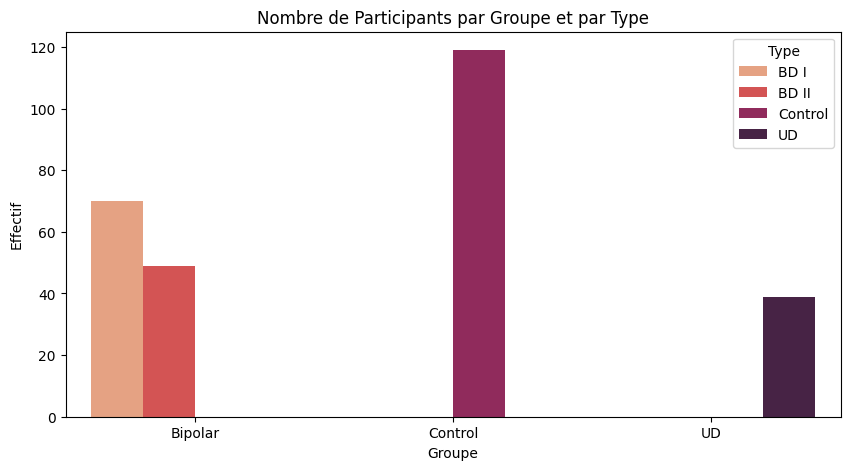

In [85]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Group', hue='Type', data=df, palette='rocket_r')
plt.title('Nombre de Participants par Groupe et par Type')
plt.xlabel('Groupe')
plt.ylabel('Effectif')
plt.legend(title='Type')
plt.show()

## 2.3) Analyse des Variables Numériques

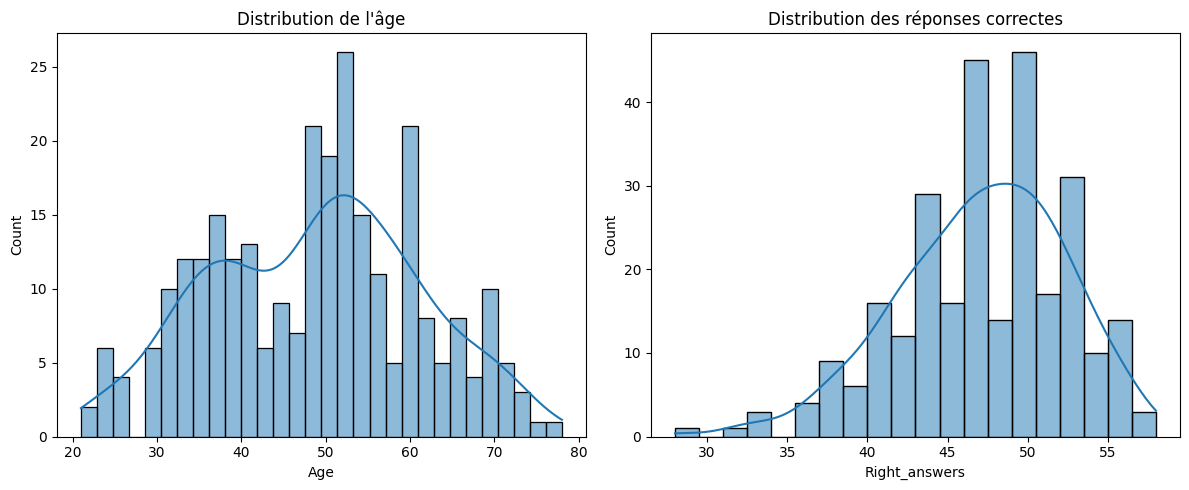

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribution de l'âge")
sns.histplot(df['Right_answers'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution des réponses correctes')
plt.tight_layout()  
plt.show()  

C:\Users\HLM\AppData\Local\Temp\ipykernel_3908\2110000212.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Audio_prosody', data=df, ax=axes[0], palette='rocket_r')
C:\Users\HLM\AppData\Local\Temp\ipykernel_3908\2110000212.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Combined_channel', data=df, ax=axes[1], palette='rocket_r')


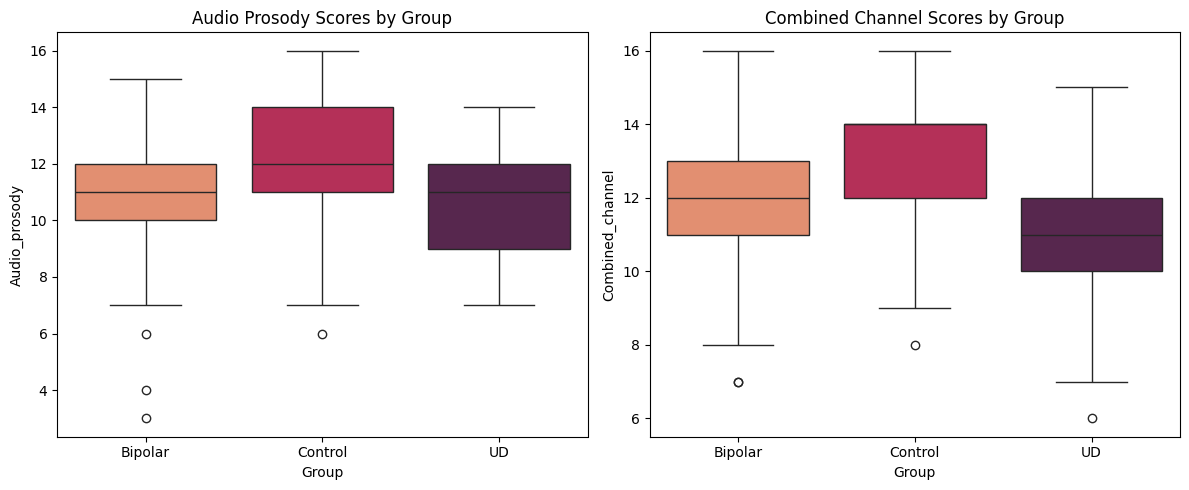

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 
sns.boxplot(x='Group', y='Audio_prosody', data=df, ax=axes[0], palette='rocket_r')
axes[0].set_title('Audio Prosody Scores by Group')
sns.boxplot(x='Group', y='Combined_channel', data=df, ax=axes[1], palette='rocket_r')
axes[1].set_title('Combined Channel Scores by Group')
plt.tight_layout()  
plt.show()  

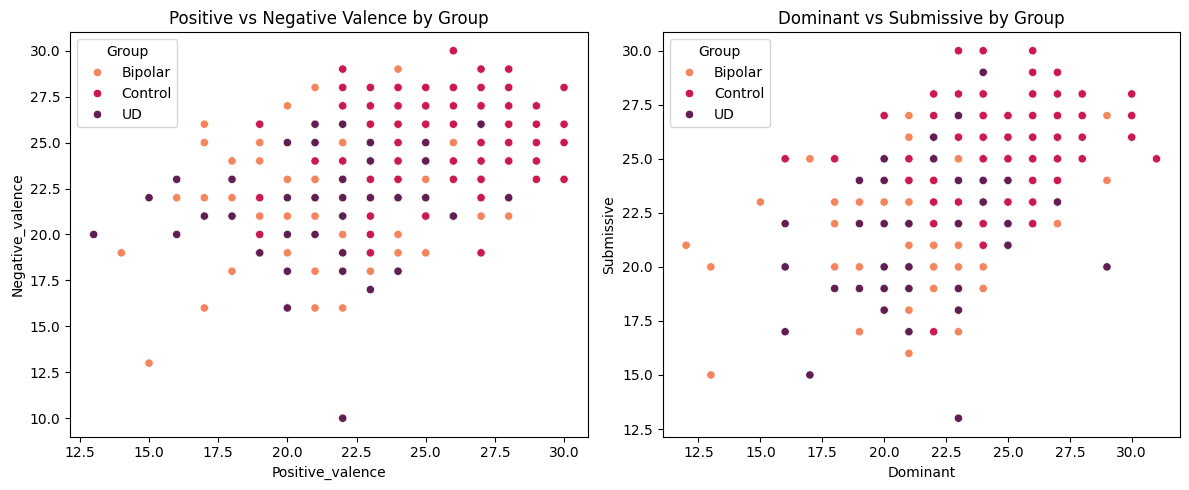

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 
sns.scatterplot(x='Positive_valence', y='Negative_valence', hue='Group', data=df, ax=axes[0], palette='rocket_r')
axes[0].set_title('Positive vs Negative Valence by Group')
sns.scatterplot(x='Dominant', y='Submissive', hue='Group', data=df, ax=axes[1], palette='rocket_r')
axes[1].set_title('Dominant vs Submissive by Group')
plt.tight_layout()
plt.show()

C:\Users\HLM\AppData\Local\Temp\ipykernel_3908\1723373015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Right_answers', data=df, palette='rocket_r')


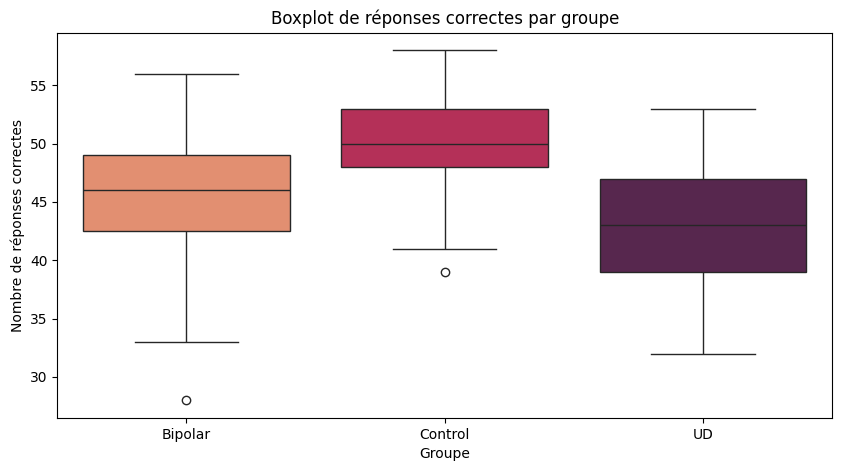

In [89]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Group', y='Right_answers', data=df, palette='rocket_r')
plt.title('Boxplot de réponses correctes par groupe')
plt.xlabel('Groupe')
plt.ylabel('Nombre de réponses correctes')
plt.show()

In [90]:
right_desc = df.groupby('Group')['Right_answers'].agg(['count', 'min', 'max', 'mean', 'std']).round(3)
right_desc.columns = ['Count', 'Min', 'Max', 'Mean', 'Std Dev (σ)']
right_desc

,Count,Min,Max,Mean,Std Dev (σ)
Group,,,,,
Bipolar,119,28,56,45.353,4.795
Control,119,39,58,50.235,3.705
UD,39,32,53,42.718,4.973


<h1 style=" color: #0c3c6c; font-size: 30px;"> III) Méthode
</h1>

- Comparaison des groupes  : Nous disposons de données issues de trois groupes distincts et souhaitons comparer leurs performances, telles que le nombre de réponses correctes. L'ANOVA constitue une méthode appropriée pour déterminer s'il existe des différences statistiquement significatives entre les moyennes de plus de deux groupes. 

- Contrôle des variables confondantes : Si nous suspectons qu'une ou plusieurs variables (telles que l'âge) pourraient influencer la variable dépendante (le nombre de réponses correctes), l'ANCOVA nous permet d'ajuster l'effet de ces covariables. Cela aidera à isoler l'effet propre de l'appartenance à un groupe sur les performances tout en contrôlant d'autres facteurs.

- Examen de plusieurs variables dépendantes : Dans le cas où l'étude mesure plusieurs variables quantitatives et dépendantes qui pourraient être liées (telles que les scores de prosodie audio, les scores de canal combiné et les perceptions de valence), la MANOVA permet de les examiner toutes en même temps. Cela nous offre une vue d'ensemble de l'impact des groupes sur ces variables interdépendantes et peut accroître la puissance statistique en tenant compte des corrélations entre les variables dépendantes.

La décision d'utiliser ces tests découle de l'objectif d'obtenir une compréhension complète des données recueillies et des relations potentielles. La présence de plusieurs groupes, de variables potentiellement confondantes et de multiples mesures de résultats sont des indicateurs clefs selon lesquels ces analyses pourraient être pertinentes et instructives. Cependant, comme mentionné précédemment, il est crucial de vérifier que les données satisfont aux hypothèses de ces tests avant de procéder à l'analyse. 

<h1 style=" color: #0c3c6c; font-size: 30px;"> IV) Anova 
</h1>

<h1 style=" color: #0c3c6c; font-size: 20px;">Échantillons aléatoires simples et indépendants
</h1>

Pour commencer, nos échantillons sont considérés comme indépendants en raison de la nature des données collectées. Chaque échantillon représente les résultats de tests individuels passés par différents types de personnes, ce qui implique que les observations ne sont pas influencées par les résultats des autres tests. En d'autres termes, les individus testés sont considérés comme des entités distinctes et leurs résultats ne sont pas liés les uns aux autres. Cela garantit que les échantillons sont collectés de manière aléatoire et indépendante, ce qui est une condition essentielle pour la mise en place de l'analyse de la variance. De plus, nous avons précédemment identifié 7 lignes en doublons dans notre jeu de données, qu'il est indispensable de supprimer pour vérifier la condition de simplicité des échantillons. Cela permet d'assurer que les observations de chaque groupe sont uniques et distinctes.

In [91]:
df=df.drop_duplicates()

<h1 style=" color: #0c3c6c; font-size: 20px;">Normalité
</h1>


In [92]:
def normalite(df,var):
# Calcul des résultats du test de Shapiro-Wilk pour chaque groupe
    shapiro_test_results = {group: shapiro(df[df[var] == group]['Right_answers'])
                        for group in df[var].unique()}

# Création du DataFrame pour les résultats du test de Shapiro-Wilk
    shapiro_df = pd.DataFrame(shapiro_test_results, index=['Statistic', 'p-value']).T.sort_index()

# Décisions au niveau de signification 
    shapiro_df['Decision at α=0.05'] = shapiro_df['p-value'].apply(lambda p: 'Reject H0' if p < 0.05 else '<span style="color: black">Accept H0</span>')
    shapiro_df['Decision at α=0.01'] = shapiro_df['p-value'].apply(lambda p: 'Reject H0' if p < 0.01 else '<span style="color: black">Accept H0</span>')
    shapiro_df['Decision at α=0.001'] = shapiro_df['p-value'].apply(lambda p: 'Reject H0' if p < 0.001 else '<span style="color: black">Accept H0</span>')

# Mise en forme conditionnelle pour les résultats du test de Shapiro-Wilk
    shapiro_summary_styled = shapiro_df.style.apply(
    lambda x: [
        'background: salmon' if x['Decision at α=0.05'] == 'Reject H0' else 'background: lightgreen',
        'background: salmon' if x['Decision at α=0.01'] == 'Reject H0' else 'background: lightgreen',
        'background: salmon' if x['Decision at α=0.001'] == 'Reject H0' else 'background: lightgreen'
    ],
    axis=1, subset=['Decision at α=0.05', 'Decision at α=0.01', 'Decision at α=0.001']
    ).format({'Statistic': '{:.3f}', 'p-value': '{:.4f}'})
    return(shapiro_summary_styled)

normalite(df,'Group')

,Statistic,p-value,Decision at α=0.05,Decision at α=0.01,Decision at α=0.001
Bipolar,0.978,0.0489,Reject H0,Accept H0,Accept H0
Control,0.981,0.1048,Accept H0,Accept H0,Accept H0
UD,0.982,0.7873,Accept H0,Accept H0,Accept H0



<h1 style=" color: #0c3c6c; font-size: 20px;"> Homogénéité des variances
</h1>

In [93]:
def homogeneite(df,var):
    valeurs = df[var].unique().tolist()
# Exécution du test de Levene
    levene_stat, levene_p = levene(
        df[df[var] == valeurs[0]]['Right_answers'],
        df[df[var] == valeurs[1]]['Right_answers'],
        df[df[var] == valeurs[2]]['Right_answers'])

# Exécution du test de Bartlett
    bartlett_stat, bartlett_p = bartlett(
        df[df['Group'] == 'Bipolar']['Right_answers'],
        df[df['Group'] == 'Control']['Right_answers'],
        df[df['Group'] == 'UD']['Right_answers'])

# Création du résumé des tests 
    combined_tests_summary = pd.DataFrame({
    'Test': ["Test de Levene", "Test de Bartlett"],
    'Statistique de test': [levene_stat, bartlett_stat],
    'p-value': [levene_p, bartlett_p],
    'Décision au niveau α=0.05': [
        "Rejet H0" if levene_p < 0.05 else '<span style="color: black">Accept H0</span>',
        "Rejet H0" if bartlett_p < 0.05 else '<span style="color: black">Accept H0</span>'],
    'Décision au niveau α=0.01': [
        "Rejet H0" if levene_p < 0.01 else '<span style="color: black">Accept H0</span>',
        "Rejet H0" if bartlett_p < 0.01 else '<span style="color: black">Accept H0</span>'],
    'Décision au niveau α=0.001': [
        "Rejet H0" if levene_p < 0.001 else '<span style="color: black">Accept H0</span>',
        "Rejet H0" if bartlett_p < 0.001 else '<span style="color: black">Accept H0</span>']})

# Mise en forme conditionnelle pour les résultats des tests
    combined_tests_formatted = combined_tests_summary.style.apply(
    lambda x: [
        'background-color: salmon' if x['Décision au niveau α=0.05'] == 'Rejet H0' else 'background-color: lightgreen',
        'background-color: salmon' if x['Décision au niveau α=0.01'] == 'Rejet H0' else 'background-color: lightgreen',
        'background-color: salmon' if x['Décision au niveau α=0.001'] == 'Rejet H0' else 'background-color: lightgreen'],
    axis=1,
    subset=['Décision au niveau α=0.05', 'Décision au niveau α=0.01', 'Décision au niveau α=0.001']
    ).format({
    'Statistique de test': '{:.3f}',
    'p-value': '{:.3f}'})
    
    return(combined_tests_formatted)

homogeneite(df,'Group')

,Test,Statistique de test,p-value,Décision au niveau α=0.05,Décision au niveau α=0.01,Décision au niveau α=0.001
0,Test de Levene,4.291,0.015,Rejet H0,Accept H0,Accept H0
1,Test de Bartlett,9.021,0.011,Rejet H0,Accept H0,Accept H0


In [94]:
decision_matrix = pd.DataFrame({
    'α de Normalité \\ Homoscédasticité': ['0.05', '0.01', '0.001'],
    '0.05': ['Kruskal-Wallis test', 'Welch ANOVA', 'Welch ANOVA'],
    '0.01': ['Kruskal-Wallis test', 'ANOVA', 'ANOVA'],
    '0.001': ['Kruskal-Wallis test', 'ANOVA', 'ANOVA']})

decision_matrix = decision_matrix.set_index('α de Normalité \\ Homoscédasticité')
decision_matrix

,0.05,0.01,0.001
α de Normalité \ Homoscédasticité,,,
0.05,Kruskal-Wallis test,Kruskal-Wallis test,Kruskal-Wallis test
0.01,Welch ANOVA,ANOVA,ANOVA
0.001,Welch ANOVA,ANOVA,ANOVA


## 4.1) ANOVA

In [95]:
groups = df["Group"].unique().tolist()
K = len(groups)
n = df.shape[0]

samples = []
for group in groups:
    sample = df['Right_answers'].loc[df.Group == group]
    samples.append(sample)
    
n_group = df["Group"].value_counts().values.tolist()
moy_emp = df['Right_answers'].mean()
moy_emp_k = np.array([np.array(sample).mean() for sample in samples])
var_cor_k = np.array([np.array(sample).var(ddof=1) for sample in samples])
nk = np.array([len(np.array(sample)) for sample in samples])

SSW = (np.vectorize(lambda n, var : (n-1)*var)(nk,var_cor_k)).sum()
MSW = SSW/(n-K)
SSB = np.multiply(nk,np.square(moy_emp_k)).sum() - n * moy_emp**2
MSB = SSB/(K-1)
f = MSB/MSW

pvalue = 1 - stats.f.cdf(f,K-1,n-K)
anova_df = pd.DataFrame({
    "Source de variation": ["Between Groups", "Within Groups", "Total"],
    "Degrés de liberté": [K - 1, n - K, n - 1],
    "Somme des carrés": [SSB, SSW, SSB + SSW],
    "Moyenne des carrés": [MSB, MSW, "---"],
    "F-Statistic": [f, np.nan, np.nan],
    "p-value": [pvalue, np.nan, np.nan]
})
anova_df = anova_df.fillna('---')
anova_df

,Source de variation,Degrés de liberté,Somme des carrés,Moyenne des carrés,F-Statistic,p-value
0,Between Groups,2,2306.209096,1153.104548,59.538783,0.0
1,Within Groups,267,5171.064978,19.367285,---,---
2,Total,269,7477.274074,---,---,---


In [96]:
f_oneway(*samples)

F_onewayResult(statistic=59.5387827560273, pvalue=4.1514405711459885e-22)

In [97]:
tukey_results = pairwise_tukeyhsd(df['Right_answers'], df['Group'])
print(tukey_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
Bipolar Control   5.0131    0.0  3.6476  6.3786   True
Bipolar      UD   -2.635 0.0038 -4.5488 -0.7212   True
Control      UD  -7.6481    0.0 -9.5766 -5.7196   True
------------------------------------------------------


## 4.2) ANOVA de Welch

In [98]:
gb = df.groupby(['Group'])
pg.welch_anova(dv='Right_answers', between='Group', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,Group,2,100.571304,62.403644,2.387633e-18,0.308429


In [99]:
pg.pairwise_gameshowell(data=df, dv='Right_answers',
                            between='Group').round(3)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Bipolar,Control,45.353,50.366,-5.013,0.562,-8.928,220.607,0.000,-1.162
1,Bipolar,UD,45.353,42.718,2.635,0.910,2.897,62.804,0.014,0.542
2,Control,UD,50.366,42.718,7.648,0.870,8.794,53.364,0.000,1.874


## 4.3) Kruskal-Wallis test

In [100]:
stats.kruskal(*samples)

KruskalResult(statistic=86.73905434724097, pvalue=1.4616845811244063e-19)

In [101]:
sp.posthoc_dunn(df, val_col='Right_answers', group_col="Group", p_adjust = 'holm').round(3)

,Bipolar,Control,UD
Bipolar,1.000,0.0,0.017
Control,0.000,1.0,0.000
UD,0.017,0.0,1.000


<h1 style=" color: #0c3c6c; font-size: 30px;"> V) Analyse de covariance
</h1>

## 5.1) ANCOVA

L'analyse de covariance (ANCOVA) est une méthode statistique qui combine les caractéristiques de l'ANOVA et de la régression linéaire. Elle est utilisée pour comparer les moyennes des groupes tout en contrôlant statistiquement l'effet de variables continues appelées covariables, qui pourraient affecter la variable dépendante.

En se basant sur les résultats du test de Kruskal-Wallis et du test post hoc de Dunn, nous savons qu'il existe des différences significatives entre les groupes. Cependant, ces tests ne prennent pas en compte l'impact potentiel d'autres variables qui pourraient influencer les résultats. Par exemple, des variables telles que l'âge, le sexe, ou d'autres mesures cliniques pourraient affecter les réponses correctes, indépendamment du groupe d'appartenance (Bipolar, Control, UD).

L'ANCOVA permet de contrôler ces variables supplémentaires, souvent appelées variables de confusion ou facteurs de confusion, en ajustant les moyennes des groupes en fonction des covariables. Ce faisant, l'ANCOVA fournit une analyse plus raffinée et peut augmenter la précision des conclusions sur les différences entre les groupes. Cela peut aussi améliorer la puissance statistique de l'analyse en réduisant la variabilité non expliquée.

Ainsi nous allons tenter de mettre en place l'ANCOVA dans notre cadre. Dans notre cadre, seul l'impact de la variable Âge sur les différences de bonnes réponses peut être testé, en plus du type de participant.
Une représentation graphique, sous forme d'un nuage de point, s'impose alors afin de visualiser une relation éventuelle entre l'âge, le groupe et le nombre de bonnes réponses. Pour rappel, il est essentiel d'avoir une relation linéaire entre les variables indépendantes (l'âge et le groupe ici) et la variable dépendante considérée (le nombre de bonnes réponses).

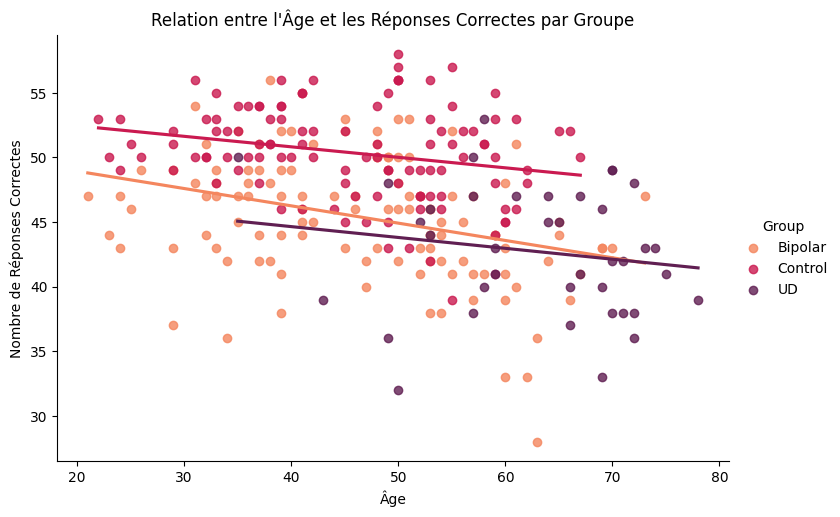

In [102]:
sns.lmplot(x='Age', y='Right_answers', hue='Group', data=df, aspect=1.5, ci=None, palette='rocket_r')
plt.title("Relation entre l'Âge et les Réponses Correctes par Groupe")
plt.xlabel('Âge')
plt.ylabel('Nombre de Réponses Correctes')
plt.show()

On observe une dispersion de points dans toute la plage d'âge pour chaque groupe. Il n'y a pas de tendance claire qui indiquerait que l'âge a un effet systématique sur le nombre de bonnes réponses pour aucun des groupes. Ainsi aucune relation linéaire claire ne peut être établie entre les variables indépendantes et la variable dépendante, ainsi les résultats de l'ANCOVA risquent de manquer de fiabilité et de pertinence.

On observe une hétérogénéité des pentes de régression, ce qui présente un problème potentiel. Des différences significatives entre les coefficients de régression des groupes indiquent que la relation entre la covariable et la variable dépendante varie entre les groupes. Dans ce cas, l'utilisation de l'ANCOVA n'est pas appropriée car l'effet de la covariable sur la variable dépendante est différent entre les groupes, c'est-à-dire que l'âge des participants a un effet différent sur le nombre de bonnes réponses pour chacun des groupes.

Les conditions préalables nécessaires à la mise en œuvre d'une ANCOVA ne sont pas satisfaites, et nous ne pouvons donc pas la mettre en place. Une alternative serait de réalise une ANOVA à deux facteurs.

## 5.1) ANOVA à deux facteurs 

L'ANOVA à deux facteurs est utilisée pour analyser l'effet de deux variables indépendantes (appelées facteurs) sur une variable dépendante. Ces deux facteurs peuvent être de nature nominale ou ordinale, et l'interaction entre eux peut également être examinée.
Cependant, contrairement à l'ANCOVA, l'ANOVA à deux facteurs ne prend pas en compte les variables continues supplémentaires (covariables) qui pourraient influencer la variable dépendante. Par conséquent, nous devons regrouper notre variable Âge en trois catégories, classant les participants du groupe le plus jeune au groupe le plus âgé, afin de procéder à cette analyse. 

Nous allons regrouper les participants en trois catégories d'âge pour mieux caractériser notre population :

- La première catégorie comprend les participants âgés de moins de 40 ans, que nous désignerons comme "Jeunes".
- La deuxième catégorie englobe ceux âgés de 40 à 55 ans, que nous identifierons comme "Adultes".
- Enfin, la troisième catégorie inclut les participants de 55 ans et plus, que nous qualifierons de "Seniors".

In [103]:
plages_age = [21, 42,55, float('inf')]
categories = ['Jeunes', 'Adultes', 'Seniors']

df_anova2=df.copy()
df_anova2['Age_Categorie'] = pd.cut(df_anova2['Age'], bins=plages_age, labels=categories, right=False)
print(df_anova2['Age_Categorie'])

0      Adultes
1      Adultes
2      Adultes
3      Adultes
4      Adultes
        ...   
272    Adultes
273     Jeunes
274    Adultes
275    Adultes
276    Seniors
Name: Age_Categorie, Length: 270, dtype: category
Categories (3, object): ['Jeunes' < 'Adultes' < 'Seniors']


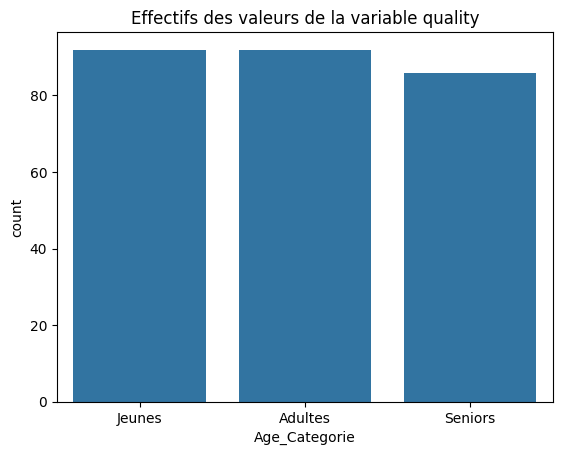

In [104]:
sns.countplot(x="Age_Categorie",data=df_anova2)
plt.title(f"Effectifs des valeurs de la variable quality")
plt.show()

In [105]:
normalite(df_anova2,'Age_Categorie')

,Statistic,p-value,Decision at α=0.05,Decision at α=0.01,Decision at α=0.001
Adultes,0.983,0.2973,Accept H0,Accept H0,Accept H0
Jeunes,0.956,0.0036,Reject H0,Reject H0,Accept H0
Seniors,0.986,0.5042,Accept H0,Accept H0,Accept H0


Nous constatons que l'hypothèse de normalité des distributions est vérifiée pour les groupes Adultes et Seniors avec un seuil alpha de 0.05, tandis que pour le groupe "Jeunes", elle est seulement satisfaite pour un seuil alpha de 0.001.

In [106]:
homogeneite(df_anova2,'Age_Categorie')

,Test,Statistique de test,p-value,Décision au niveau α=0.05,Décision au niveau α=0.01,Décision au niveau α=0.001
0,Test de Levene,4.170,0.016,Rejet H0,Accept H0,Accept H0
1,Test de Bartlett,9.021,0.011,Rejet H0,Accept H0,Accept H0


In [107]:
model = ols('Right_answers ~ Group + Age_Categorie + Group:Age_Categorie', data=df_anova2).fit()

#ANOVA à 2 facteurs
resultats_anova = sm.stats.anova_lm(model, typ=2)
print(resultats_anova)

                          sum_sq     df          F        PR(>F)
Group                1723.492071    2.0  49.286423  6.940606e-19
Age_Categorie         389.630355    2.0  11.142196  2.272641e-05
Group:Age_Categorie   217.992980    4.0   3.116955  1.575032e-02
Residual             4563.441643  261.0        NaN           NaN


<h1 style=" color: #0c3c6c; font-size: 30px;"> VI) Manova 
</h1>

C:\Users\HLM\AppData\Local\Temp\ipykernel_3908\582833183.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=var, data=df, ax=axes[row, col], palette ='rocket_r')
C:\Users\HLM\AppData\Local\Temp\ipykernel_3908\582833183.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=var, data=df, ax=axes[row, col], palette ='rocket_r')
C:\Users\HLM\AppData\Local\Temp\ipykernel_3908\582833183.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=var, data=df, ax=axes[row, col], palette ='rocket_r')
C:\Users\HLM\AppDat

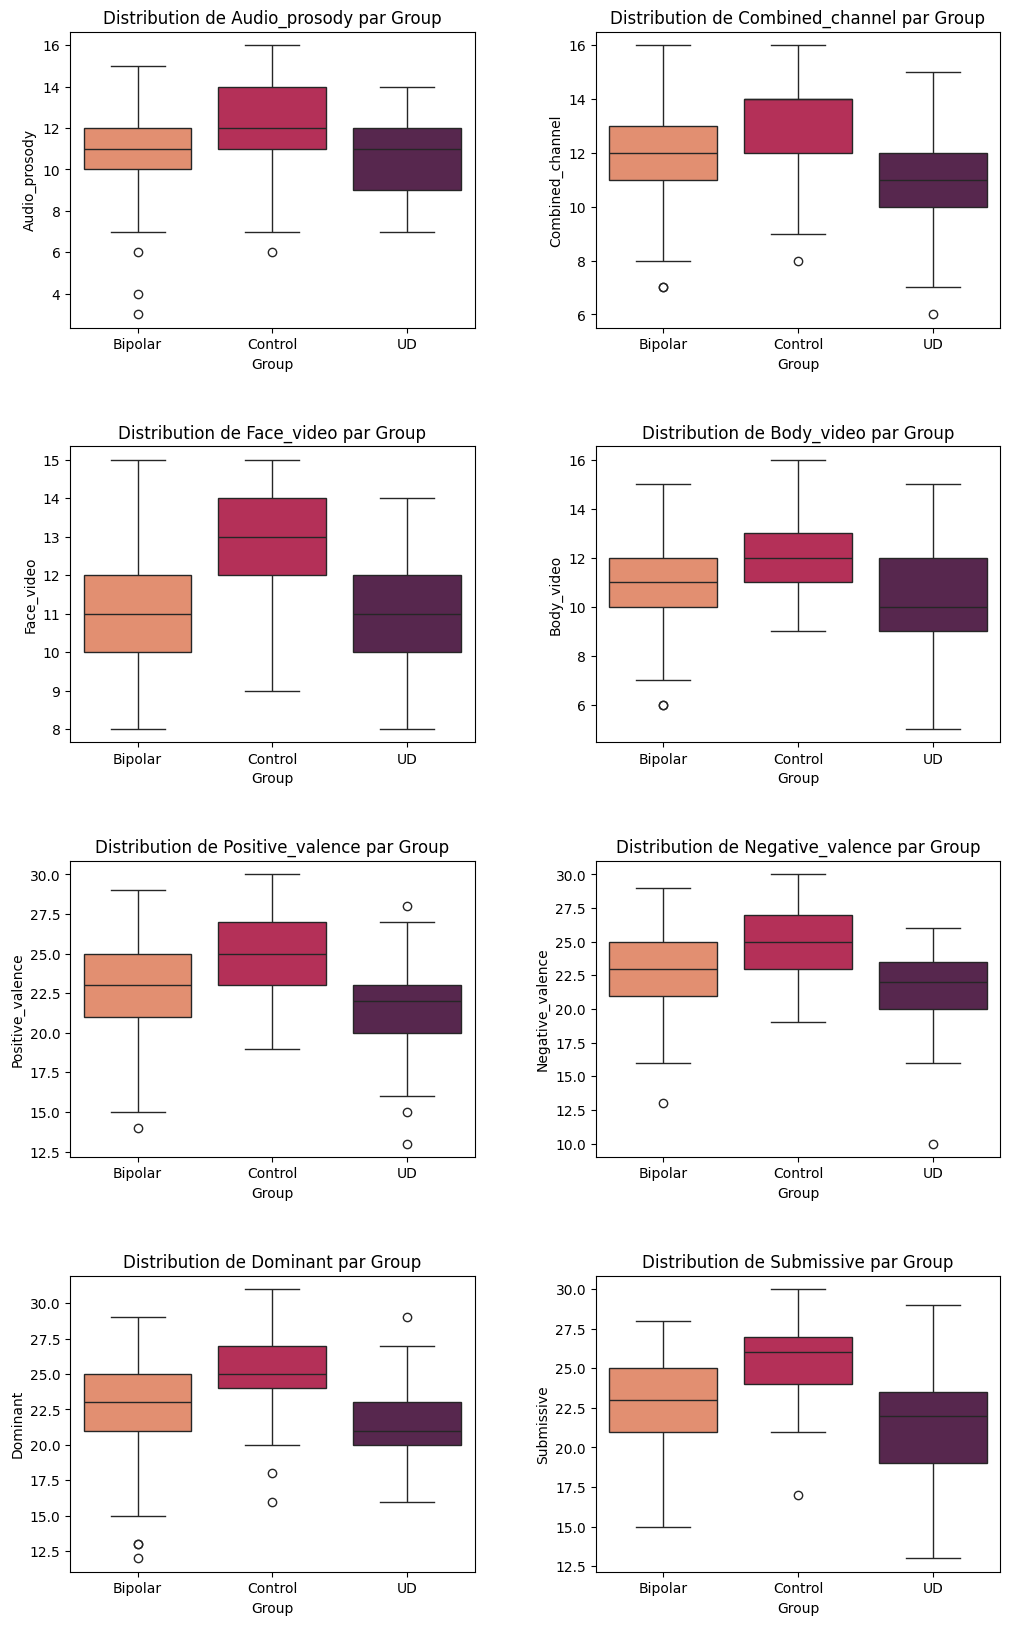

In [108]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 20))

plt.subplots_adjust(hspace=0.4, wspace=0.3)

for i, var in enumerate(df.columns[-8:]):
    row, col = divmod(i, 2)
    sns.boxplot(x='Group', y=var, data=df, ax=axes[row, col], palette ='rocket_r')
    axes[row, col].set_title(f'Distribution de {var} par Group')
    axes[row, col].set_xlabel('Group')
    axes[row, col].set_ylabel(var)
if len(df.columns[-8:]) % 2 != 0: #avant variables
    fig.delaxes(axes.flatten()[-1])

plt.show()

In [109]:
def mean_norm(df_input):
    return df_input.apply(lambda X: (X - X.mean()) / X.std(), axis=0)
scaled_data=mean_norm(df.iloc[:, 2:])
scaled_data['Group']=df['Group']
print(scaled_data)

          Age  Right_answers  Audio_prosody  Combined_channel  Face_video  \
0   -0.123951      -1.337543      -1.129887         -0.690339   -1.647281   
1    0.035415       0.369510       0.747464          0.339448   -0.470652   
2   -0.283316      -0.768525      -1.129887         -0.690339    0.705978   
3    0.354145      -0.578853      -0.660549         -1.205233    0.117663   
4    0.115097       0.559183       1.216801          0.339448   -0.470652   
..        ...            ...            ...               ...         ...   
272  0.354145      -0.199507       0.278126         -1.205233   -0.470652   
273 -1.080143       0.559183       0.747464          1.369236    0.705978   
274  0.035415      -2.096233      -1.129887         -2.235020   -1.058967   
275 -0.442682      -1.527215       0.278126         -1.720127   -1.647281   
276  1.230655      -0.389180      -0.660549         -0.175445   -0.470652   

     Body_video  Positive_valence  Negative_valence  Dominant  Submissive  

In [110]:
shapiro_test_results = {}

for var in df.columns[-8:]:
    shapiro_test_results[var] = {group: shapiro(scaled_data[scaled_data['Group'] == group][var])
                                 for group in scaled_data['Group'].unique()}

shapiro_df_list = []

for var, results in shapiro_test_results.items():
    temp_df = pd.DataFrame(results, index=['Statistic', 'p-value']).T
    temp_df['Variable'] = var
    shapiro_df_list.append(temp_df)

shapiro_df_global = pd.concat(shapiro_df_list).reset_index().rename(columns={'index': 'Group'})
shapiro_df_global['Decision at α=0.05'] = shapiro_df_global['p-value'].apply(lambda p: 'Reject H0' if p < 0.05 else '<span style="color: black">Accept H0</span>')
shapiro_df_global['Decision at α=0.01'] = shapiro_df_global['p-value'].apply(lambda p: 'Reject H0' if p < 0.01 else '<span style="color: black">Accept H0</span>')
shapiro_df_global['Decision at α=0.001'] = shapiro_df_global['p-value'].apply(lambda p: 'Reject H0' if p < 0.001 else '<span style="color: black">Accept H0</span>')

shapiro_summary_styled = shapiro_df_global.style.apply(
    lambda x: ['background: salmon' if x['Decision at α=0.05'] == 'Reject H0' else 'background: lightgreen', 
               'background: salmon' if x['Decision at α=0.01'] == 'Reject H0' else 'background: lightgreen',
              'background: salmon' if x['Decision at α=0.001'] == 'Reject H0' else 'background: lightgreen'],
    axis=1, subset=['Decision at α=0.05', 'Decision at α=0.01', 'Decision at α=0.001']
).format({'Statistic': '{:.3f}', 'p-value': '{:.4f}'})
shapiro_summary_styled


,Group,Statistic,p-value,Variable,Decision at α=0.05,Decision at α=0.01,Decision at α=0.001
0,Bipolar,0.938,0.0000,Audio_prosody,Reject H0,Reject H0,Reject H0
1,Control,0.961,0.0023,Audio_prosody,Reject H0,Reject H0,Accept H0
2,UD,0.939,0.0356,Audio_prosody,Reject H0,Accept H0,Accept H0
3,Bipolar,0.965,0.0032,Combined_channel,Reject H0,Reject H0,Accept H0
4,Control,0.934,0.0000,Combined_channel,Reject H0,Reject H0,Reject H0
5,UD,0.962,0.2135,Combined_channel,Accept H0,Accept H0,Accept H0
6,Bipolar,0.959,0.0011,Face_video,Reject H0,Reject H0,Accept H0
7,Control,0.946,0.0002,Face_video,Reject H0,Reject H0,Reject H0
8,UD,0.944,0.0505,Face_video,Accept H0,Accept H0,Accept H0
9,Bipolar,0.951,0.0003,Body_video,Reject H0,Reject H0,Reject H0


In [111]:
boxMTest = pg.box_m(scaled_data, dvs= df.columns[-8:], group='Group')
print(boxMTest)

          Chi2    df      pval  equal_cov
box  33.927436  72.0  0.999962       True


In [114]:
formula = 'Audio_prosody + Combined_channel + Face_video + Body_video + \
           Positive_valence + Negative_valence + Dominant + Submissive ~ Group'

manova_results = MANOVA.from_formula(formula, data=df).mv_test()

manova_results.results['Group']["stat"]

,Value,Num DF,Den DF,F Value,Pr > F
Wilks' lambda,0.667865,14,522.0,8.338774,0.0
Pillai's trace,0.335829,14.0,524.0,7.553078,0.0
Hotelling-Lawley trace,0.49179,14,414.253262,9.142246,0.0
Roy's greatest root,0.480393,7,262,17.980405,0.0


C:\Users\HLM\AppData\Local\Temp\ipykernel_3908\2520070675.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Group', y=var, data=df, ax=axes[i], ci='sd', palette='rocket_r')
C:\Users\HLM\AppData\Local\Temp\ipykernel_3908\2520070675.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y=var, data=df, ax=axes[i], ci='sd', palette='rocket_r')
C:\Users\HLM\AppData\Local\Temp\ipykernel_3908\2520070675.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Group', y=var, data=df, ax=axes[i], ci='sd', palette='rocket_r')
C:\Users\HLM\AppData\Local\Temp\ipykernel_3908\2520070675.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable 

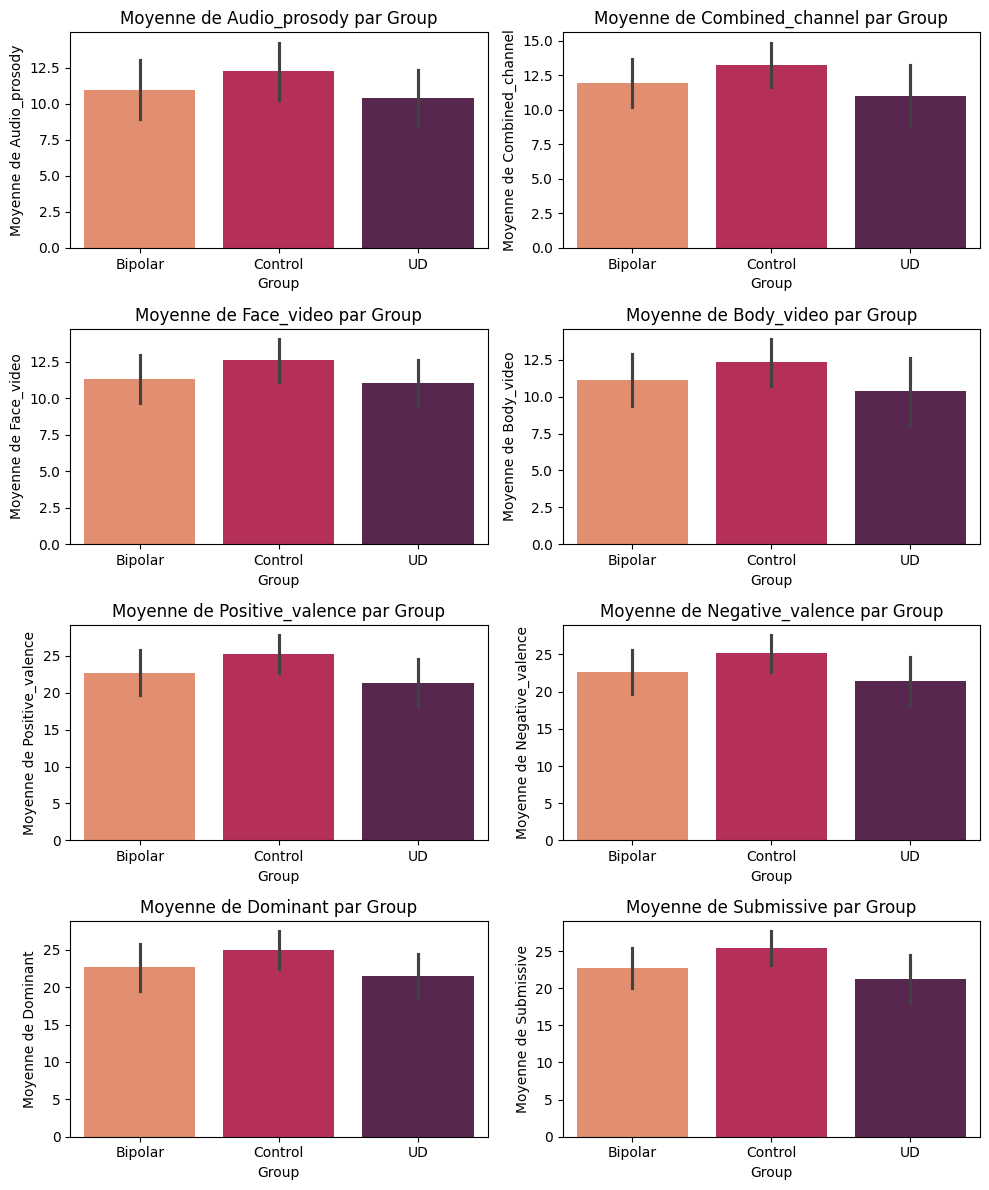

In [113]:
fig, axes = plt.subplots(4, 2, figsize=(10, 12))
axes = axes.flatten()  

for i, var in enumerate(df.columns[-8:]):
    sns.barplot(x='Group', y=var, data=df, ax=axes[i], ci='sd', palette='rocket_r')
    axes[i].set_title(f'Moyenne de {var} par Group')
    axes[i].set_xlabel('Group')
    axes[i].set_ylabel('Moyenne de ' + var)

plt.tight_layout()
plt.show()